In [100]:
%matplotlib notebook
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as anim


In [56]:
def System(r_,t,m,r,d,g,psidot,theta0):
    
    phi=r_[0]
    psi=r_[1]
    theta=r_[2]
    omega=r_[3]
    
    
    
    dphi= ((0.5*m*r**2)*psidot*(np.cos(theta0)-np.cos(theta)))/((0.25*m*r**2+m*d**2)*np.sin(theta)**2+(0.5*m*r**2)*np.cos(theta)**2)
    
    dpsi= psidot
    
    domega = 1/(0.25*m*r**2+m*d**2) *(dpsi**2 * np.sin(theta)*np.cos(theta)*(0.25*m*r**2+m*d**2-0.5*m*r**2)\
                                     -dphi*dpsi*0.5*m*r**2 + m*g*d*np.sin(theta) )
    dtheta=omega
    
    
    
    return [dphi,dpsi,dtheta,domega]
                    

In [143]:
m=0.1
r=0.1
d=0.3
g=9.81
psidot=400
theta0=0.25*np.pi
t=np.linspace(0,8,10000)
r0=[0,0,theta0,0]



In [144]:
sol= odeint(System,r0,t,args=(m,r,d,g,psidot,theta0))

In [145]:
phi=sol[:,0]
psi=sol[:,1]
theta=sol[:,2]
thetadot=sol[:,3]


<IPython.core.display.Javascript object>


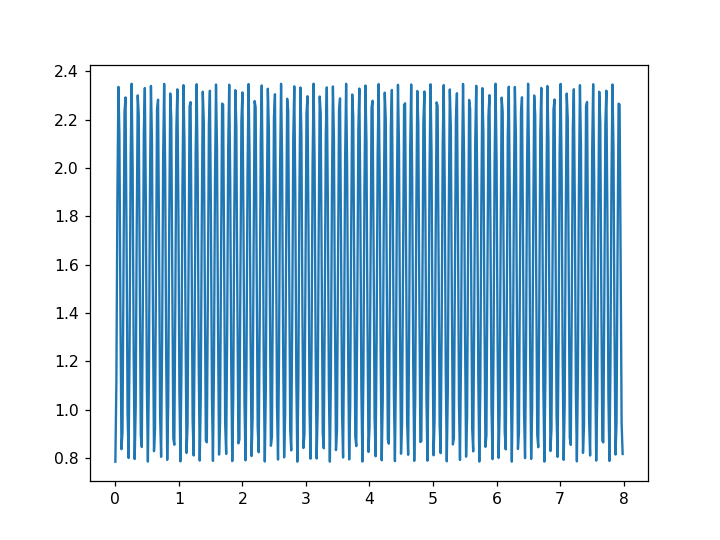

In [151]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.plot(t[::20],theta[::20])

<IPython.core.display.Javascript object>


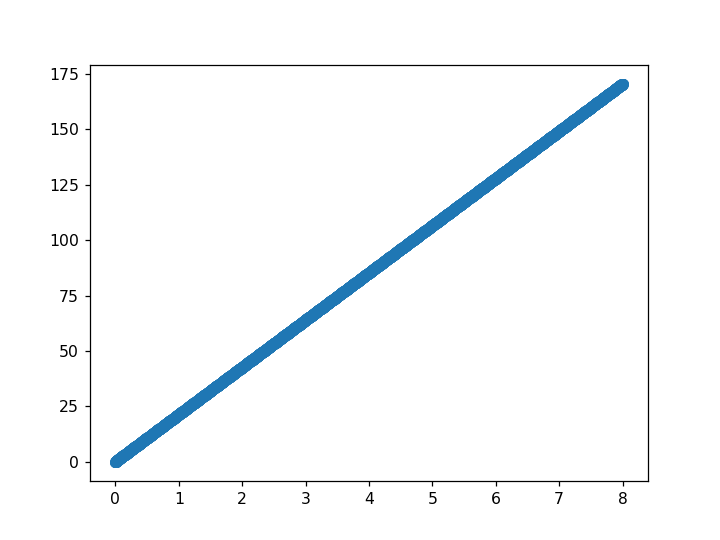

In [147]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(t,phi)

<IPython.core.display.Javascript object>


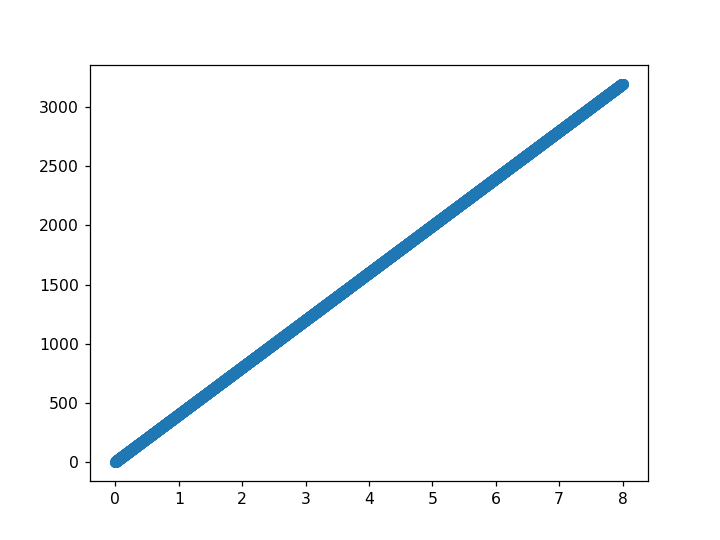

In [148]:
fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.scatter(t,psi)

In [149]:

position=np.zeros([len(t),3])

for i in range(len(t)):
    position[i,0]=d*np.sin(theta[i])*np.cos(phi[i])
    position[i,1]=d*np.sin(theta[i])*np.sin(phi[i])
    position[i,2]=d*np.cos(theta[i])

<IPython.core.display.Javascript object>


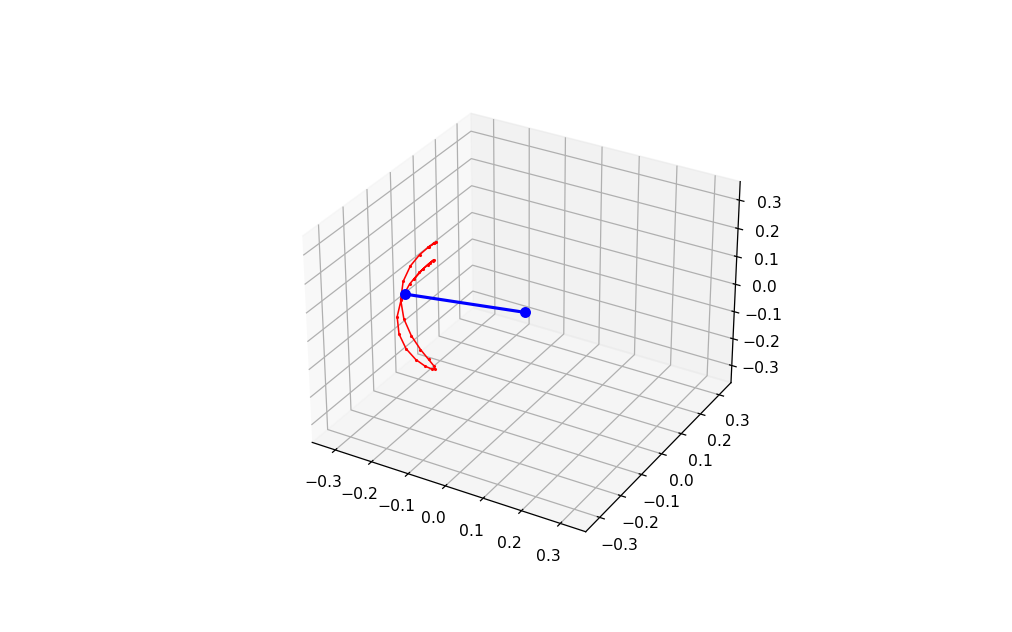

In [188]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')


def init():
    
    ax.clear()
    ax.set_xlim(-0.35,0.35)
    ax.set_ylim(-0.35,0.35)
    ax.set_zlim(-0.35,0.35)
    
   




def Update(i):
    
    init()

        
    x = position[i,0]
    y = position[i,1]
    z = position[i,2]
    
    history_x=position[:i,0]
    history_y=position[:i,1]
    history_z=position[:i,2]
    
    
      
    if i<=30:
    
     
      ax.plot(history_x, history_y,history_z,'.-', lw=1, ms=2,c="r")
    
    else:     
      ax.plot(history_x[i-30:i], history_y[i-30:i],history_z[i-30:i],'.-', lw=1, ms=2,c="r")

    ax.scatter(x,y,z,c="b")
    ax.plot([0,x], [0,y],[0,z], 'o-', lw=2,c="b")
  
    
    
   
   
 
    

  
        
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)